# Resume Classification

# Business objective:
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

In [265]:
##from google.colab import drive
##drive.mount('/content/drive/')

In [266]:
##!pip install python-doc
##!python3 -m pip install docx2txt
##!pip install textract
##!sudo apt-get install antiword
##!pip install python-docx
##!pip install xgboost

In [267]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [268]:
os.listdir('/content/drive/MyDrive/Resumes')

['Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Thirupathiamma.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React Developer_Haripriya.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Deepakreddy.docx',
 'React Dev_Krishna Kanth.docx',
 'React JS Developer_Venkatalakshmi (1)-conver

In [269]:
file_path = []
category = []

In [270]:
directory = '/content/drive/MyDrive/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [271]:
file_path, category

(['MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n\n\t   Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.\n\nKnowledge in Object Oriented PHP Programming.\n\nKnowledge in versioning control like GIT.\n\nInvolved in Responsive web development using Bootstrap.\n\nStrong Analytical, Problem solving skills, Presentation skills and  good team player.\n\nI can work with independently.\n\n\n\n\n\nSCHOLASTICS\n\n                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.\n\nTECHNICAL SKILLS\n\nWeb Technologies\t                :\tHTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY, \n\n                                                                             PHP, React js , Node js.                                                                              \n\nDatabase\

In [272]:
file_path_1 = []
category_1 = []

In [273]:
directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resume')

In [274]:
file_path_1, category_1

(['\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ years of experience in implementing, upgrading, and supporting\n   PeopleSoft database administration including Human Capital Management\n   (HCM), Financials, Campus Solutions and Portal IHUB\n • Expertise in installation, configuration, setup, security and management\n   of the PeopleSoft Internet Architecture PIA environment.\n • In-depth experience in analysis, planning, development, and\n   implementation stages, including load testing, quality assurance, and\n   tuning.\n • Gained extensive exposure in deploying PeopleSoft Environments.\n • Experienced in Troubleshooting PeopleSoft Components.\n • Skilled with the capability to analyse & interpret unique problems with a\n   combination of training experience & logical thinking to find  the  right\n   solutions\n\n\nCore Competencies:\n\n\n    ➢ PeopleSoft Implementation.\n    ➢      Troubleshooting        PeopleSoft       performance       issues.\n\n\n    ➢ Project /Data Migration\n  

In [275]:
file_path_2 = []
category_2 = []

In [276]:
directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resume')

In [277]:
file_path_2, category_2

(['\n\nCareer objective\n\n\nA rewarding opportunity in a growth-oriented company, this  gives  me  scope\nto apply my knowledge and become an active member of a team to  work.  I  am\nseeking responsible position as to use my  diverse  skills,  experience  and\nadvanced technical knowledge to develop innovative solutions.\n\n\n2 Experience Summary\n\n\n\n • I.T. Professional with 3.2 years of total experience in MICROSOFT SQL\n   SERVER Development with a talent for analyzing problems, developing and\n   simplifying procedures and finding innovative solutions.\n • Experience in writing joins and set operators in order to pull data from\n   multiple tables and combines data from multiple select queries results.s\n • Good knowledge in creating constraints on tables.\n • Hands on experience in Sub queries in order to store temporary result set\n   of select queries.\n • Good knowledge on CTE (Common table expression) and Recursive CTE.\n • Experience In using system functions (aggregate 

In [278]:
file_path_3 = []
category_3 = []

In [279]:
directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')

In [280]:
file_path_3, category_3

(['Srikanth (WORKDAY hCM Consultant)\t                          \n\n\t\t\t\t\t                         \t\n\n\t\t\t\t\n\nSeeking suitable positions in Workday HCM  as Techno functional consultant with a reputed organization that would help me utilize my skills and grow as an individual to deliver more for the organization’s growth.                                                                                  \t\t\t                     \n\n\tPROFESSIONAL EXPERIENCE – 4 + years (Serving  Notice).\n\n\tHIGHLIGHTS\n\n\tWorkday Integration, Studio, Core HCM, Recruiting, Benefits, Leave of absence. \n\n\tTrainings on Core Financials Integration, Workday Studio.\n\n\tStrong in EIB Inbound & Outbound, Reports, Calculated Fields, Custom Objects, Business Process, Dashboards, CCW/PICOF, Calc Fields, BIRT,\n\n\tWorked on Implementations and Configuration, security, Business Process.\n\n\tAchievements:\n\n\tSuccessfully completed 2 major Project’s implementations.\n\n\tKT to the new hires, Prov

In [281]:
data = pd.DataFrame(data = file_path , columns = ['Resumes'])

In [282]:
data['category'] = category
data

,Resumes,category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
1,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
3,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume
5,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
6,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
7,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
8,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
9,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume


In [283]:
data_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_1['category_1'] = category_1
data_1

,Resumes,category_1
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resume
1,Classification: Internal\n\nClassification: In...,PeopleSoft Resume
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resume
3,\n PEOPLESOFT Adminis...,PeopleSoft Resume
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,PeopleSoft Resume
5,\n PeopleSoft Admin/Peo...,PeopleSoft Resume
6,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft Resume
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resume
8,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft Resume
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft Resume


In [284]:
data_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_2['category_2'] = category_2
data_2

,Resumes,category_2
0,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning Insight Resume
1,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning Insight Resume
2,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resume
3,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resume
4,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resume
5,\n SQL S...,SQL Developer Lightning Insight Resume
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning Insight Resume
7,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
8,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume
9,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume


In [285]:
data_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_3['category_3'] = category_3
data_3

,Resumes,category_3
0,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
1,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resume
2,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resume
3,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resume
4,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resume
5,G Himaja\n\n ...,Workday Resume
6,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday Resume
7,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume
8,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resume
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume


In [286]:
df = data.append([data_1, data_2, data_3], ignore_index = True)

In [287]:
df

,Resumes,category,category_1,category_2,category_3
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,NaN,NaN,NaN
1,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,NaN,NaN,NaN
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,NaN,NaN,NaN
3,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,NaN,NaN,NaN
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\n[pic] Name...,NaN,NaN,NaN,Workday Resume
75,\n Hari Krishna ...,NaN,NaN,NaN,Workday Resume
76,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resume
77,\nShireesh ...,NaN,NaN,NaN,Workday Resume


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   category    24 non-null     object
 2   category_1  20 non-null     object
 3   category_2  14 non-null     object
 4   category_3  21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [289]:
df['Category'] = category + category_1 + category_2 + category_3
df

,Resumes,category,category_1,category_2,category_3,Category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n[pic] Name...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,\n Hari Krishna ...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resume,Workday Resume
77,\nShireesh ...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [290]:
df.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)

In [291]:
df

,Resumes,Category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
1,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
3,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume
...,...,...
74,\n[pic] Name...,Workday Resume
75,\n Hari Krishna ...,Workday Resume
76,\nVenkateswarlu.B ...,Workday Resume
77,\nShireesh ...,Workday Resume


In [292]:
df.head()

,Resumes,Category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
1,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
3,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume


In [293]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt)                                                          # stemming

In [294]:
df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))

In [295]:
df

,Resumes,Category
0,mareedu lokesh babu professional overview arou...,React JS Developer Resume
1,ranga gaganam professional summary professiona...,React JS Developer Resume
2,pranish sonone career summary experience years...,React JS Developer Resume
3,name prabakaran title ui developer professiona...,React JS Developer Resume
4,kambala sai surendra summary project basic kno...,React JS Developer Resume
...,...,...
74,pic name j sumanth royal professional summary ...,Workday Resume
75,hari krishna summary result oriented professio...,Workday Resume
76,venkateswarlu b workday consultant years exper...,Workday Resume
77,shireesh balasani hcm consultant profile summa...,Workday Resume


Exploratory Data Analysis

In [296]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('environment', 139), ('developer', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

In [297]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


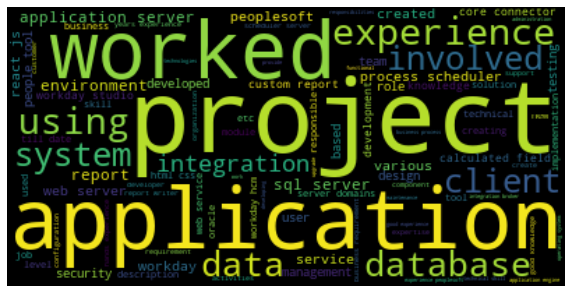

In [298]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [299]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [300]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 24  profile summary years experience implementing ...  PeopleSoft Resume
 25  classification internal classification interna...  PeopleSoft Resume
 26  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 27  peoplesoft administrator srinivas k experience...  PeopleSoft Resume
 28  vinod akkala peoplesoft dba admin professional...  PeopleSoft Resume
 29  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 30  peoplesoft administration vivekanand sayana ca...  PeopleSoft Resume
 31  hari narayana professional summary years exper...  PeopleSoft Resume
 32  murali professional summary years experience p...  PeopleSoft Resume
 33  priyabrata hota career objective pursuing peop...  PeopleSoft Resume
 34  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resume
 35  tanna sujatha objective seeking challenging ro...  PeopleSoft Resume
 36  anubhav kumar singh core competen

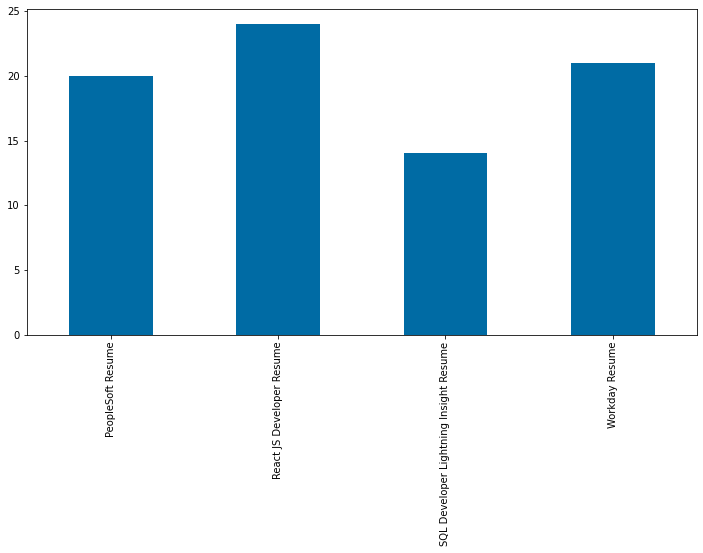

In [301]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [302]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [303]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

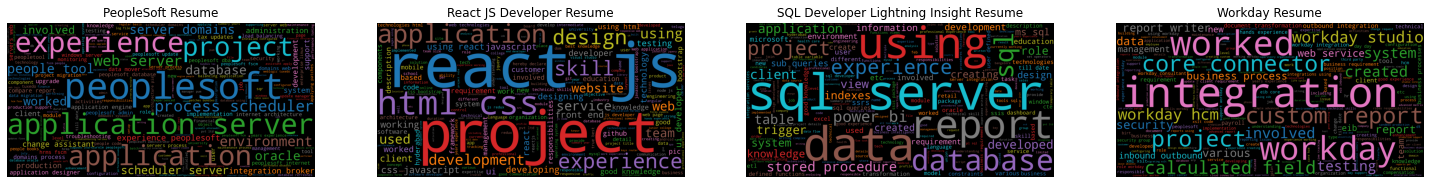

In [304]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [305]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

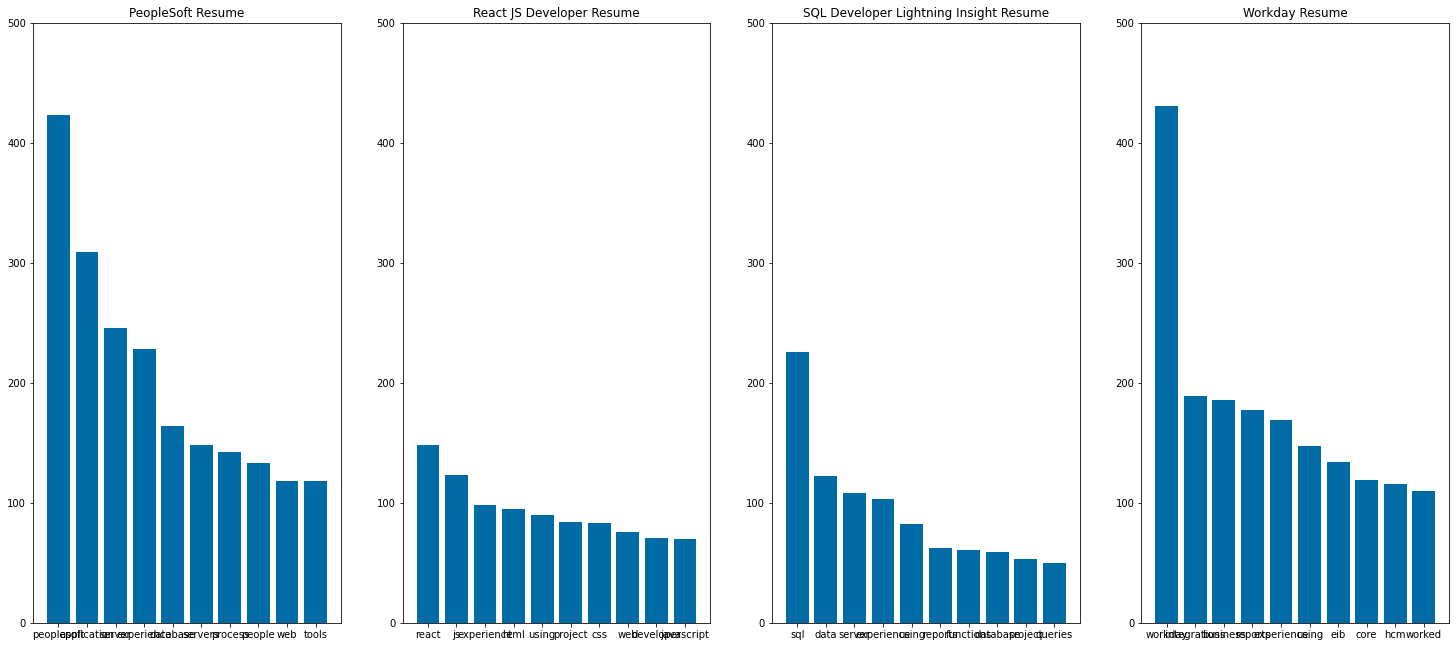

In [306]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [307]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [308]:
df

,Resumes,Category
0,mareedu lokesh babu professional overview arou...,1
1,ranga gaganam professional summary professiona...,1
2,pranish sonone career summary experience years...,1
3,name prabakaran title ui developer professiona...,1
4,kambala sai surendra summary project basic kno...,1
...,...,...
74,pic name j sumanth royal professional summary ...,3
75,hari krishna summary result oriented professio...,3
76,venkateswarlu b workday consultant years exper...,3
77,shireesh balasani hcm consultant profile summa...,3


In [309]:
df.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

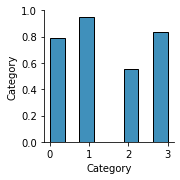

In [310]:
import seaborn as sns
sns.pairplot(data = df)

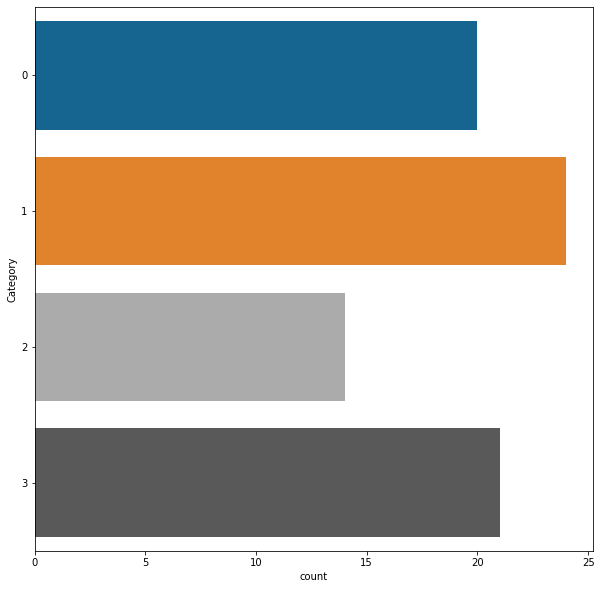

In [311]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [312]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

In [313]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [314]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

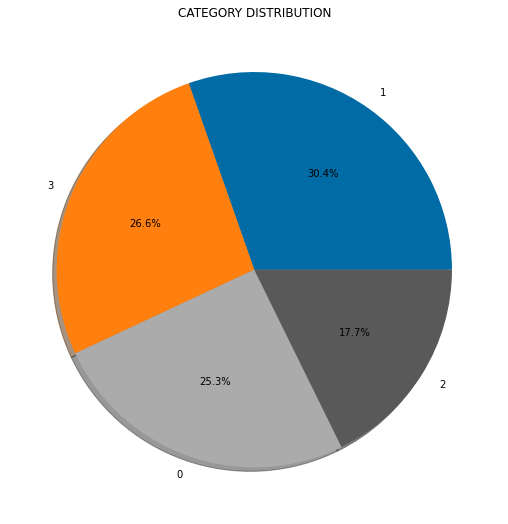

In [315]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [316]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1832
Number of words not Lemmatized= 0


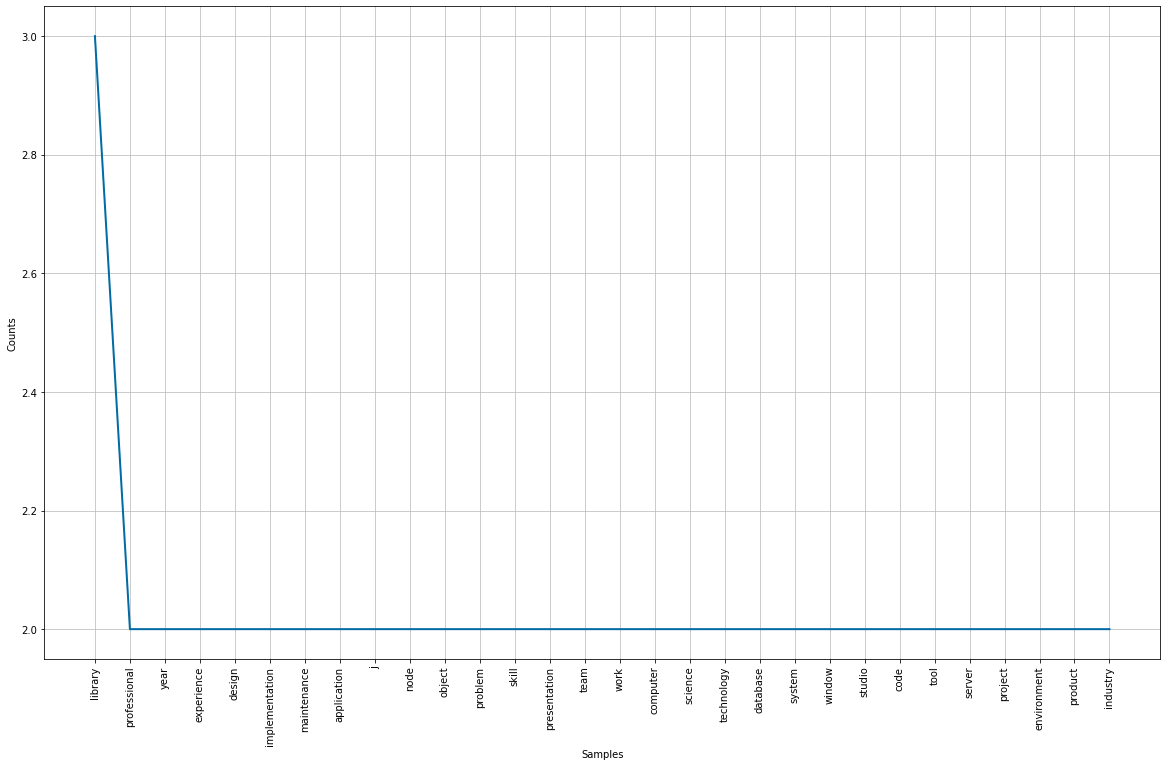

In [317]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [318]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [319]:
requiredText = df['Resumes'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [320]:
from sklearn.model_selection import train_test_split

In [321]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4464), (16, 4464))

In [322]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [324]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000


In [325]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [326]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [327]:
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [328]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.9375


In [329]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [330]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [331]:
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9375
f1-Score         :  0.9416
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [332]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.9375


In [333]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.92        16
weighted avg       0.95      0.94      0.93        16




In [334]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [335]:
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9167
f1-Score        :  0.9222
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 2 1]
 [0 0 0 4]]


In [336]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9375


In [337]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [338]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [339]:
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [340]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.7460
Accuracy of AdaBoost Classifier on test set    : 0.7500


In [341]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.64      0.75      0.68        16
weighted avg       0.61      0.75      0.66        16




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [343]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy Score  :  0.75
Precision Score :  0.6389
Recall Score    :  0.75
f1-Score        :  0.6786
Confusion Matrix:
 [[0 4 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [344]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 0.8750


In [345]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         3
           3       0.80      1.00      0.89         4

    accuracy                           0.88        16
   macro avg       0.90      0.89      0.89        16
weighted avg       0.89      0.88      0.87        16




In [346]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [347]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  0.875
Precision Score :  0.9
Recall Score    :  0.8875
f1-Score        :  0.8865
Confusion Matrix:
 [[3 1 0 0]
 [0 4 0 1]
 [0 0 3 0]
 [0 0 0 4]]


In [348]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [349]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 0.9375


In [350]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(objective='multi:softprob'):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [351]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [352]:
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [353]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 0.8125


In [354]:
print("\n Classification report for LightGradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for LightGradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.80      0.80      0.80         5
           2       0.75      1.00      0.86         3
           3       1.00      0.75      0.86         4

    accuracy                           0.81        16
   macro avg       0.82      0.82      0.82        16
weighted avg       0.83      0.81      0.81        16




In [355]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [356]:
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy Score  :  0.8125
Precision Score :  0.825
Recall Score    :  0.825
f1-Score        :  0.8161
Confusion Matrix:
 [[3 1 0 0]
 [0 4 1 0]
 [0 0 3 0]
 [1 0 0 3]]


In [357]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,0.9375,0.9583,0.9375,0.9416
2,Multinomial NB Classifier,0.9375,0.9500,0.9167,0.9222
3,Logistic Regression,0.9375,0.9583,0.9375,0.9416
4,AdaBoost Classifier,0.7500,0.6389,0.7500,0.6786
5,Gradient Boosting Classifier,0.8750,0.9000,0.8875,0.8865
6,Xtreme Gradient Boosting Classifier,0.9375,0.9583,0.9375,0.9416
7,Light Gradient Boosting Classifier,0.8125,0.8250,0.8250,0.8161
